# Using the OmicsIntegrator Package

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
# Use the following lines to test the basic functionality of the package if developing locally: 
import sys
sys.path.insert(0, "/Users/alex/Documents/OmicsIntegrator2/src")
import graph as oi

# import OmicsIntegrator as oi

In [3]:
interactome_file = "../interactomes/inbiomap.9.12.2016.exp.oi2"
prize_file = "/Users/alex/Documents/abcd1/human_deseq_prizes_200.tsv"
graph = oi.Graph(interactome_file, {'g':5})

In [4]:
graph.prepare_prizes(prize_file)

01:04:15 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
01:04:15 - OI2: INFO - []
01:04:15 - OI2: INFO - Members of the prize file not present in the interactome:
01:04:15 - OI2: INFO - ['ATP6V0E1', 'CXorf36', 'GLT25D1', 'NORAD', 'TNFSF4']


In [5]:
vertex_indices, edge_indices = graph.pcsf()

In [6]:
len(vertex_indices)

77

In [7]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


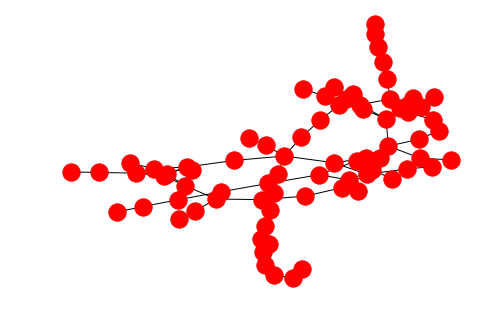

In [8]:
nx.draw_spring(augmented_forest)

In [9]:
graph.pcsf_objective_value(forest)

371.7926050647195

In [10]:
oi.get_networkx_graph_as_dataframe_of_nodes(augmented_forest).head()

,Base_Mean,P_adj,P_value,StdErr,Wald_Stats,betweenness,degree,general_function,general_process,location,log2FC,louvain_clusters,prize,specific_function,specific_process,terminal,type
KCNA4,NaN,NaN,NaN,NaN,NaN,0.0484211,18,transporter,localization,plasma_membrane,NaN,0,0,transmembrane transporter,establishment of localization,False,protein
STAT5A,NaN,NaN,NaN,NaN,NaN,0.0902164,87,transcription regulator,cellular process,nucleus,NaN,1,0,DNA-binding transcription factor,cellular response to stimulus,False,protein
STOM,6249.28,9.87156e-197,3.8564e-199,0.0436482,30.1076,0.0263158,107,binding,cellular process,vesicle,-1.31414,2,1.96006,protein binding,cell activation,True,protein
DKK1,1105.15,2.45959e-256,5.41759e-259,0.0860106,34.3778,0.054152,17,binding,biological regulation,endosome,-2.95685,3,2.55609,protein binding,regulation of biological process,True,protein
EXTL3,NaN,NaN,NaN,NaN,NaN,0.0519298,16,catalytic,cellular process,ER,NaN,4,0,transferase,cell communication,False,protein


In [11]:
oi.output_networkx_graph_as_interactive_html(augmented_forest, output_dir='/Users/alex/Desktop/')

PosixPath('/Users/alex/Desktop/graph.html')